In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = 'C:\\Users\\monam\\OneDrive\\Desktop\\testtTR1.csv'
data = pd.read_csv(file_path)



# Re-encode the target variable according to the new structure
data['TR1'] = data['TR1'].replace({1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1})

# Specifying categorical columns for one-hot encoding
categorical_columns = ['AGE', 'GEN', 'DIS', 'EDU', 'HHI', 'CWS']

# Creating the preprocessor for one-hot encoding and standard scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('std', StandardScaler(), data.drop(columns=categorical_columns + ['TR1']).columns)
    ],
    remainder='passthrough'
)

# Creating the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

# Splitting the data into training and testing sets with stratified sampling
X = data.drop('TR1', axis=1)
y = data['TR1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Setting up GridSearchCV for hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', verbose=2)

# Fitting the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predicting on the test set
y_pred = grid_search.predict(X_test)

# Evaluation metrics
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Displaying results
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("\nClassification Report:\n", classification_report_result)
print("\nConfusion Matrix:\n", confusion_matrix_result)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.4s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_s

C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.2s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.2s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.2s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.2s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.2s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.2s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifie

C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.2s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.3s
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best Score: nan

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79        71
           1       0.89      0.90      0.89       139

    accuracy                           0.86       210
   macro avg       0.84      0.84      0.84       210
weighted avg       0.86      0.86      0.86       210


Confusion Matrix:
 [[ 55  16]

C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [2]:
!pip install shap lime anchor-exp

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/275.7 kB 660.6 kB/s eta 0:00:01
     ---------- -------------------------- 81.9/275.7 kB 762.6 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/275.7 kB 655.4 kB/s eta 0:00:01
     ------------------------------- ------ 225.3/275.7 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/427.3 kB ? eta -:--:--
     -------------------- ----------------- 225.3/427.3 kB 6.9 MB/s eta 0:00:01
     -------------------------------- ----- 368.6/427.3 kB 4.6 MB/s eta 0:00:01
     -------------------------------------- 427.3/427.3 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): start

In [3]:
import shap
# Create a SHAP explainer
explainer = shap.Explainer(grid_search.best_estimator_['classifier'], X_train)
shap_values = explainer(X_test)
# Visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.378200, while the model output was 0.300000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [4]:
explainer = shap.Explainer(grid_search.best_estimator_['classifier'], X_train, check_additivity=False)
shap_values = explainer(X_test)

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.379800, while the model output was 0.460000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [5]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('std', StandardScaler(), data.drop(columns=categorical_columns + ['TR1']).columns)
    ],
    remainder='passthrough'
)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(**grid_search.best_params_)

TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'classifier__max_depth'

In [6]:
# Extract best parameters and remove the 'classifier__' prefix
rf_params = {k.replace('classifier__', ''): v for k, v in grid_search.best_params_.items()}

# Create the RandomForestClassifier with the adjusted parameters
rf_classifier = RandomForestClassifier(**rf_params)

In [7]:
# Preprocessor remains the same
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('std', StandardScaler(), data.drop(columns=categorical_columns + ['TR1']).columns)
    ],
    remainder='passthrough'
)

# Create the pipeline for SHAP
shap_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

# Train this pipeline on the full training data
shap_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['AGE', 'GEN', 'DIS', 'EDU',
                                                   'HHI', 'CWS']),
                                                 ('std', StandardScaler(),
                                                  Index(['EXP_1', 'EXP_2', 'IMP_1', 'IMP_2', 'RES_1', 'RES_2', 'RES_3', 'RES_4',
       'FOOBE_1', 'FOOBE_3', 'FOOBE_4', 'FOOBE_5', 'FOOBE_9', 'NEP_1', 'NEP_2',
       'NEP_3', 'SN_1', 'SN_2', 'FAI_1', 'FAI_2', 'SR_1', 'SR_2', 'SC_1',
       'AFC_1', 'AFC_2', 'TH_1', 'TH_2', 'TH_3', 'COPK_1', 'COPK_2', 'COPK_3',
       'CLK_1', 'CLK_2', 'CLK_3', 'INF_1', 'INF_2', 'INF_3', 'INF_4'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(n_estimators=50))])

In [8]:
# Create SHAP explainer with the trained RandomForestClassifier
explainer = shap.Explainer(shap_pipeline.named_steps['classifier'])
shap_values = explainer.shap_values(preprocessor.transform(X_test))

# Visualization of SHAP values
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])

DimensionError: Length of features is not equal to the length of shap_values!

In [9]:
# Transform a small sample and get feature names
sample_transformed = preprocessor.transform(X_train.head())
transformed_feature_names = preprocessor.get_feature_names_out()

# If the above line causes an error, use the following alternative:
# transformed_feature_names = [f"feature_{i}" for i in range(sample_transformed.shape[1])]

In [10]:
# Create SHAP explainer with the trained RandomForestClassifier
explainer = shap.Explainer(shap_pipeline.named_steps['classifier'])
shap_values = explainer.shap_values(preprocessor.transform(X_test))

In [11]:
# Visualization of SHAP values for the first instance in the test set
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], sample_transformed[0], feature_names=transformed_feature_names)

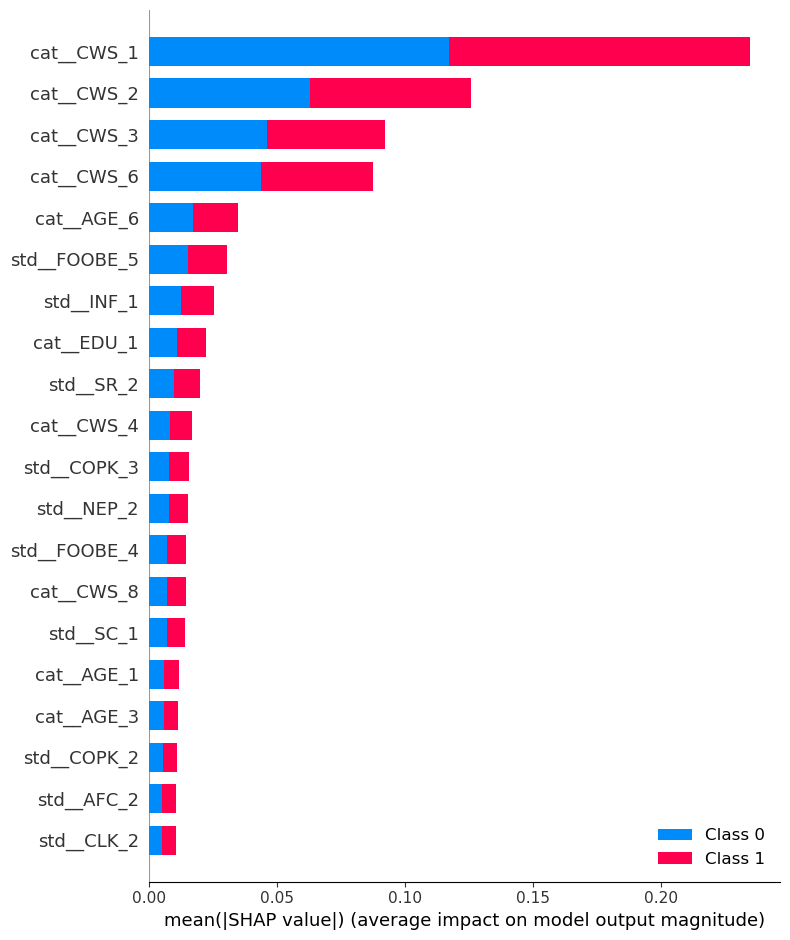

In [12]:
# Generate SHAP values for all test instances
shap_values = explainer.shap_values(preprocessor.transform(X_test))

# Make sure we have the correct transformed feature names
transformed_feature_names = preprocessor.get_feature_names_out()

# Now create the summary plot for all features across all test instances
shap.summary_plot(shap_values, features=preprocessor.transform(X_test), feature_names=transformed_feature_names)

In [13]:
import shap

# Assuming 'model' is your trained model and 'X' is your dataset

# Create a SHAP explainer object. If you have a tree-based model like RandomForest:
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for all test examples
shap_values = explainer.shap_values(X)

# Generate the summary plot
shap.summary_plot(shap_values, X, feature_names=X.columns)

NameError: name 'model' is not defined

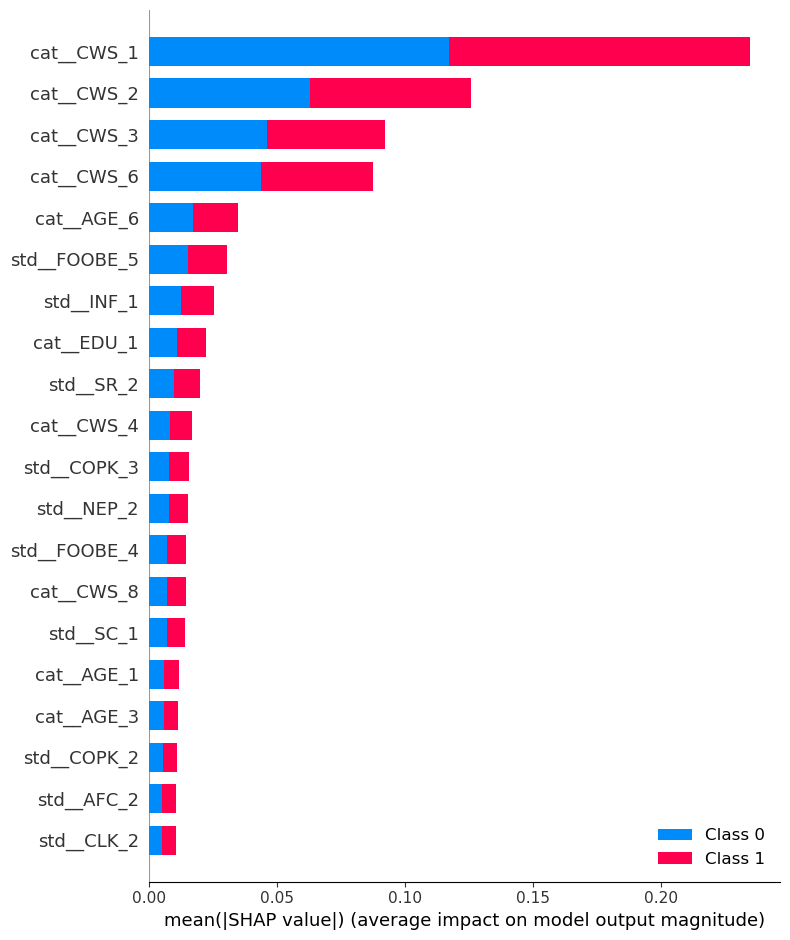

In [14]:
import shap

# Assuming 'shap_pipeline' is your trained pipeline and 'X_test' is your dataset
# Create a SHAP explainer object using the RandomForestClassifier inside the pipeline
explainer = shap.TreeExplainer(shap_pipeline.named_steps['classifier'])

# Calculate SHAP values for all test examples, ensure that 'X_test_transformed' is the preprocessed data
X_test_transformed = shap_pipeline.named_steps['preprocessor'].transform(X_test)
shap_values = explainer.shap_values(X_test_transformed)

# Generate the summary plot
shap.summary_plot(shap_values, X_test_transformed, feature_names=transformed_feature_names)

In [15]:
import lime
import lime.lime_tabular

# Assuming 'pipeline' is your trained pipeline and 'X_test' is your dataset

# Create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Class 0', 'Class 1'],  # Update with your actual class names
    mode='classification'
)

# Explain an individual prediction from your test set
# Choose an index i for which you want to explain the prediction
i = 0
exp = explainer.explain_instance(X_test.values[i], pipeline.predict_proba, num_features=10)

# Visualize the explanation
exp.show_in_notebook(show_table=True)

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [16]:
# Fit the pipeline to your training data if you haven't already
shap_pipeline.fit(X_train, y_train)

# Now create the LIME explainer with the fitted pipeline
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=shap_pipeline.named_steps['preprocessor'].transform(X_train),
    feature_names=transformed_feature_names,
    class_names=['0', '1'],  # Adjust according to your actual class names
    mode='classification'
)

# Pick an instance to explain
i = 0  # Index of the instance in the test set
# Make sure to transform the instance using the same preprocessing as your training data
instance_to_explain = shap_pipeline.named_steps['preprocessor'].transform([X_test.iloc[i]])

# The prediction function should take the raw features and return a probability. 
# Since we're using a pipeline that includes preprocessing, we can just use the predict_proba method of the pipeline
predict_fn = lambda x: shap_pipeline.predict_proba(shap_pipeline.named_steps['preprocessor'].transform(x))

# Explain the instance
exp = explainer.explain_instance(instance_to_explain[0], predict_fn, num_features=10)

# Visualize the explanation
exp.show_in_notebook(show_table=True)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [17]:
# Fit the pipeline to your training data if you haven't already
shap_pipeline.fit(X_train, y_train)

# Now create the LIME explainer with the fitted pipeline
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=shap_pipeline.named_steps['preprocessor'].transform(X_train),
    feature_names=transformed_feature_names,
    class_names=['Class 0', 'Class 1'],  # Adjust according to your actual class names
    mode='classification'
)

# Pick an instance to explain
i = 0  # Index of the instance in the test set
# Make sure to transform the instance using the same preprocessing as your training data
instance_to_explain = shap_pipeline.named_steps['preprocessor'].transform([X_test.iloc[i]])

# The prediction function should take the raw features and return a probability. 
# Since we're using a pipeline that includes preprocessing, we can just use the predict_proba method of the pipeline
predict_fn = lambda x: shap_pipeline.predict_proba(shap_pipeline.named_steps['preprocessor'].transform(x))

# Explain the instance
exp = explainer.explain_instance(instance_to_explain[0], predict_fn, num_features=10)

# Visualize the explanation
exp.show_in_notebook(show_table=True)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [18]:
import numpy as np
import lime
import lime.lime_tabular

# Make sure the pipeline is fitted
shap_pipeline.fit(X_train, y_train)

# Create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=shap_pipeline.named_steps['preprocessor'].transform(X_train),
    feature_names=transformed_feature_names,
    class_names=[0,1],  # Adjust according to your actual class names
    mode='classification'
)

# Pick an instance to explain
i = 0  # Index of the instance in the test set

# Convert the single instance to a 2D array suitable for the ColumnTransformer
# Note: X_test should be a DataFrame
instance_to_explain = X_test.iloc[[i]].values

# Define the prediction function for the pipeline
predict_fn = lambda x: shap_pipeline.predict_proba(shap_pipeline.named_steps['preprocessor'].transform(x))

# Use LIME to explain this instance
exp = explainer.explain_instance(instance_to_explain[0], predict_fn, num_features=10)

# Visualize the explanation
exp.show_in_notebook(show_table=True)

IndexError: index 44 is out of bounds for axis 0 with size 44

In [19]:
import lime
import lime.lime_tabular

# Make sure the pipeline is fitted
shap_pipeline.fit(X_train, y_train)

# Create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=shap_pipeline.named_steps['preprocessor'].transform(X_train),
    feature_names=transformed_feature_names,
    class_names=[0,1],  # Adjust according to your actual class names
    mode='classification'
)

# Pick an instance to explain
i = 0  # Index of the instance in the test set

# Convert the single instance to a 2D array suitable for the ColumnTransformer
instance_to_explain = X_test.iloc[[i]].values.reshape(1, -1)

# Define the prediction function for the pipeline
predict_fn = lambda x: shap_pipeline.predict_proba(x)

# Use LIME to explain this instance
# Since LIME requires the raw data, we need to inverse transform the preprocessed data to its original form
# This is necessary if the ColumnTransformer has transformed the feature space
inverse_transformed_instance = shap_pipeline.named_steps['preprocessor'].inverse_transform(instance_to_explain)

# Now, explain the instance with LIME
exp = explainer.explain_instance(inverse_transformed_instance.ravel(), predict_fn, num_features=10)

# Visualize the explanation
exp.show_in_notebook(show_table=True)

AttributeError: 'ColumnTransformer' object has no attribute 'inverse_transform'

In [20]:
import lime
import lime.lime_tabular

# Ensure that the pipeline is fitted
shap_pipeline.fit(X_train, y_train)

# Create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,  # Use raw training data here
    feature_names=X_train.columns.tolist(),  # Use raw feature names
    class_names=[0,1],  # Adjust according to your actual class names
    categorical_features=[X_train.columns.get_loc(col) for col in categorical_columns],  # Specify categorical features by index
    mode='classification'
)

# Pick an instance to explain
i = 0  # Index of the instance in the test set

# Extract the instance from the raw test data
instance_to_explain = X_test.iloc[i].values

# Define the prediction function for the pipeline
# The function should take raw data and perform any necessary transformations as part of the pipeline
predict_fn = lambda x: shap_pipeline.predict_proba(shap_pipeline.named_steps['preprocessor'].transform(x.reshape(1, -1)))

# Use LIME to explain this instance using the raw data
exp = explainer.explain_instance(instance_to_explain, predict_fn, num_features=10)

# Visualize the explanation
exp.show_in_notebook(show_table=True)

ValueError: X has 220000 features, but ColumnTransformer is expecting 44 features as input.

In [21]:
import lime
import lime.lime_tabular

# Ensure that the pipeline is fitted
shap_pipeline.fit(X_train, y_train)

# Create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,  # Use raw training data here
    feature_names=X_train.columns.tolist(),  # Use raw feature names
    class_names=['Class 0', 'Class 1'],  # Adjust according to your actual class names
    categorical_features=[X_train.columns.get_loc(col) for col in categorical_columns],  # Specify categorical features by index
    mode='classification'
)

# Pick an instance to explain
i = 0  # Index of the instance in the test set

# Extract the instance from the raw test data
instance_to_explain = X_test.iloc[i].values

# Define the prediction function for the pipeline
# The function should take raw data and perform any necessary transformations as part of the pipeline
predict_fn = lambda x: shap_pipeline.predict_proba(shap_pipeline.named_steps['preprocessor'].transform(np.array(x).reshape(1, -1)))

# Use LIME to explain this instance using the raw data
exp = explainer.explain_instance(instance_to_explain, predict_fn, num_features=10)

# Visualize the explanation
exp.show_in_notebook(show_table=True)

ValueError: X has 220000 features, but ColumnTransformer is expecting 44 features as input.

In [22]:
# Extract the instance from the raw test data
instance_to_explain = X_test.iloc[i].values
print("Shape of instance_to_explain before reshape:", instance_to_explain.shape)

Shape of instance_to_explain before reshape: (44,)


In [23]:
def predict_fn(x):
    # Ensure x is in the correct shape for a single sample
    x_reshaped = np.array(x).reshape(1, -1)
    print("Shape of x_reshaped:", x_reshaped.shape)
    
    # Apply the preprocessor transformation
    x_transformed = shap_pipeline.named_steps['preprocessor'].transform(x_reshaped)
    print("Shape of x_transformed:", x_transformed.shape)
    
    # Return the predicted probabilities
    return shap_pipeline.predict_proba(x_transformed)

# Use the standalone function in LIME
exp = explainer.explain_instance(instance_to_explain, predict_fn, num_features=10)

Shape of x_reshaped: (1, 220000)


ValueError: X has 220000 features, but ColumnTransformer is expecting 44 features as input.

In [24]:
def predict_fn(x):
    # Ensure x is in the correct shape for a single sample
    x_reshaped = x.reshape(1, -1)
    print("Shape of x_reshaped:", x_reshaped.shape)
    
    # Apply the preprocessor transformation
    x_transformed = shap_pipeline.named_steps['preprocessor'].transform(x_reshaped)
    print("Shape of x_transformed:", x_transformed.shape)
    
    # Return the predicted probabilities
    return shap_pipeline.predict_proba(x_transformed)

# Use the standalone function in LIME
exp = explainer.explain_instance(instance_to_explain, predict_fn, num_features=10)

Shape of x_reshaped: (1, 220000)


ValueError: X has 220000 features, but ColumnTransformer is expecting 44 features as input.

In [25]:
# Extract the instance from the raw test data
instance_to_explain = X_test.iloc[i].values

# Print the instance and its shape
print("Instance to explain:", instance_to_explain)
print("Shape of instance_to_explain:", instance_to_explain.shape)

# Reshape the instance and print the reshaped instance and its shape
x_reshaped = instance_to_explain.reshape(1, -1)
print("Reshaped instance:", x_reshaped)
print("Shape of x_reshaped:", x_reshaped.shape)

Instance to explain: [5 5 5 4 5 2 3 3 7 6 4 5 5 3 2 5 4 5 1 1 4 2 3 4 5 6 6 6 4 4 4 2 4 4 0 3 2
 3 3 2 3 1 7 1]
Shape of instance_to_explain: (44,)
Reshaped instance: [[5 5 5 4 5 2 3 3 7 6 4 5 5 3 2 5 4 5 1 1 4 2 3 4 5 6 6 6 4 4 4 2 4 4 0 3
  2 3 3 2 3 1 7 1]]
Shape of x_reshaped: (1, 44)


In [26]:
# Define a new prediction function
def predict_fn(x):
    # Reshape the instance to (1, -1)
    x_reshaped = x.reshape(1, -1)

    # Apply the preprocessor transformation manually
    x_transformed = shap_pipeline.named_steps['preprocessor'].transform(x_reshaped)

    # Use the trained classifier to predict_proba
    return shap_pipeline.named_steps['classifier'].predict_proba(x_transformed)

# Use the new function in LIME
exp = explainer.explain_instance(instance_to_explain, predict_fn, num_features=10)

# Visualize the explanation
exp.show_in_notebook(show_table=True)

ValueError: X has 220000 features, but ColumnTransformer is expecting 44 features as input.